# Práctica Final: Clasificación con Scikit-learn y MLflow

En esta práctica, utilizarás un conjunto de datos de Scikit-learn (podeís usar el mismo que en el notebook de Intro MLFlow) para entrenar un modelo de clasificación.

Pasos a seguir:

    Exploración de Datos: Analiza el conjunto de datos proporcionado para comprender su estructura y contenido.

    Preprocesamiento de Texto: Realiza tareas de preprocesamiento de texto, como tokenización y vectorización, para preparar los datos para el modelado.

    Entrenamiento del Modelo: Utiliza algoritmos de clasificación de Scikit-learn para entrenar un modelo con los datos preprocesados.

    Evaluación del Modelo: Evalúa el rendimiento del modelo utilizando métricas de evaluación estándar como precisión y recall.

    Registro de Métricas con MLflow: Utiliza MLflow para registrar métricas y hiperparámetros durante el entrenamiento, facilitando la gestión y comparación de experimentos.


Nota: Dado que no voy a poder tener acceso a vuestros logs de MLFlow añadirme las imagenes de la interfaz de MLFlow en el notebook

In [ ]:
!pip install mlflow
!pip install pyngrok
!pip install ngrok

In [ ]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score

from sklearn.datasets import load_breast_cancer

# EXPLORACIÓN DE DATOS

In [ ]:
cancer = load_breast_cancer()

In [ ]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [ ]:
df['target'] = cancer['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.shape

(569, 31)

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

# Entrenamiento del modelo

In [ ]:

train, test = train_test_split(df, test_size=0.2)

In [ ]:
test_target = test['target']
test[['target']].to_csv('test-target.csv', index=False)
del test['target']
test.to_csv('test.csv', index=False)

In [ ]:
features = [x for x in list(train.columns) if x != 'target']
x_raw = train[features]
y_raw = train['target']


In [ ]:
features = [x for x in list(train.columns) if x != 'target']
x_raw = train[features]
y_raw = train['target']

x_train, x_test, y_train, y_test = train_test_split(x_raw, y_raw,
                                                            test_size=.20,
                                                            random_state=123,
                                                            stratify=y_raw)

In [ ]:
clf = RandomForestClassifier(n_estimators=100,
                            min_samples_leaf=2,
                            class_weight='balanced',
                            random_state=123)

preprocessor = Pipeline(steps=[('scaler', StandardScaler())])

model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('RandomForestClassifier', clf)])


In [ ]:
model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler())])),
                ('RandomForestClassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_leaf=2,
                                        random_state=123))])

In [ ]:
test_predict = model.predict(x_test)

# EVALUACIÓN DEL MODELO

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import f1_score, recall_score, precision_score, precision_recall_fscore_support


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve

print('Confussion matrix:\n{}'.format(confusion_matrix(y_test, test_predict)))
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predict)))
print('Accuracy score:{}'.format(accuracy_score(y_test, test_predict)))

Confussion matrix:
[[33  1]
 [ 3 54]]

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        34
           1       0.98      0.95      0.96        57

    accuracy                           0.96        91
   macro avg       0.95      0.96      0.95        91
weighted avg       0.96      0.96      0.96        91

Accuracy score:0.9560439560439561


In [ ]:
p, r, thresholds = precision_recall_curve(y_test, test_predict)

In [ ]:
import matplotlib.pyplot as plt

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

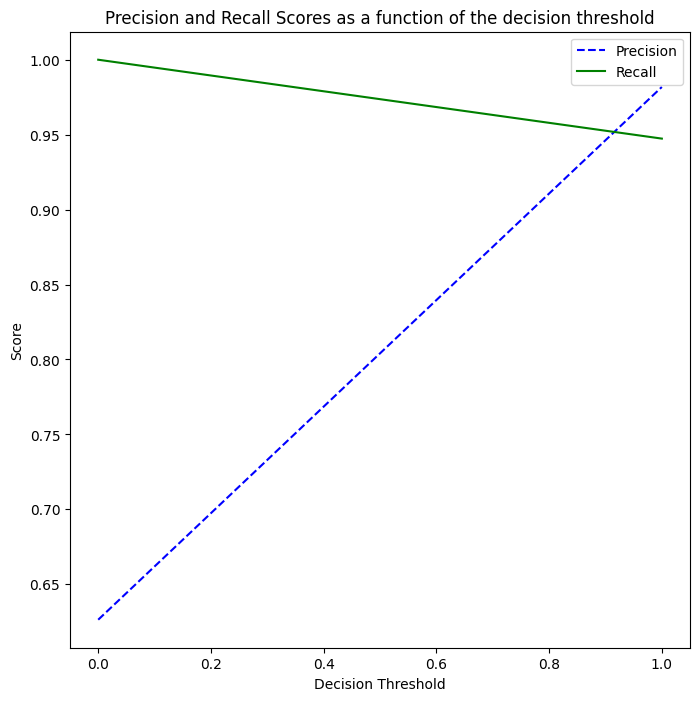

In [ ]:
plot_precision_recall_vs_threshold(p, r, thresholds)

In [ ]:
f1_score = f1_score(y_test, test_predict, average='binary')
recall_score = recall_score(y_test, test_predict, average='binary')
precision_score = precision_score(y_test, test_predict, average='binary')
support_score = precision_recall_fscore_support(y_test, test_predict, average='binary')
accuracy_score = accuracy_score(y_test, test_predict, normalize=True, sample_weight=None)

# REGISTRO DE METRICAS EN MLFLOW

In [ ]:
import ngrok

ngrok.kill()

<Task pending name='Task-8' coro=<wrap() running at ngrok_wrapper:6>>

In [ ]:
import pandas as pd
import numpy as np
import mlflow
import time
import mlflow.sklearn
import subprocess
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import f1_score, recall_score, precision_score, precision_recall_fscore_support
from sklearn.datasets import load_breast_cancer

x_train, x_test, y_train, y_test = train_test_split(x_raw, y_raw,
                                                            test_size=.20,
                                                            random_state=123,
                                                            stratify=y_raw)

n_estimators = [2,10,20,30,50,80,100,130]

mlflow_ui_process = subprocess.Popen(['mlflow', 'ui', '--port', '5000'])

mlflow.set_experiment('Carles Practica: Cancer Classifier with Accuracy')
for i in n_estimators:
  with mlflow.start_run() as run:
    clf = RandomForestClassifier(n_estimators=i,
                                min_samples_leaf=2,
                                class_weight='balanced',
                                random_state=42)

    preprocessor = Pipeline(steps=[('scaler', StandardScaler())])

    model = Pipeline(steps=[('preprocessor', preprocessor),
                              ('RandomForestClassifier', clf)])

    model.fit(x_train, y_train)

    test_predict = model.predict(x_test)

    # Calcular las métricas
    metric_f1_score = f1_score(y_test, test_predict, average='binary')
    metric_recall_score = recall_score(y_test, test_predict, average='binary')
    metric_precision_score = precision_score(y_test, test_predict, average='binary')
    metric_accuracy_score = accuracy_score(y_test, test_predict, normalize=True, sample_weight=None)


    accuracy_train = model.score(x_train, y_train)
    model.score(x_test, y_test)

    mlflow.log_metric('m1', 1.0)
    mlflow.log_param('n_estimators', i)
    mlflow.log_metric('accuracy_train', metric_accuracy_score)
    mlflow.log_metric('f1_score', metric_f1_score)
    mlflow.log_metric('recall_score', metric_recall_score)
    mlflow.log_metric('precision_score', metric_precision_score)
    mlflow.log_param('n_stimators', i)
    mlflow.sklearn.log_model(model, 'classifier_model')
    time.sleep(1)

In [ ]:
import ngrok
import mlflow
from pyngrok import ngrok

get_ipython().system_raw('mlflow ui --port 5000 &')

# --- Kill any existing ngrok processes ---
ngrok.kill()

NGROK_AUTH_TOKEN = '2jC0MmYLF7XZGPVZDskq5WXHBNI_721AWLxukJXwxzZhRiXe2'
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# --- Check for and close existing tunnels ---
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
    print("Closing tunnel: ", tunnel.public_url)
    tunnel.close()

# --- Start a new tunnel ---
ngrok_tunnel = ngrok.connect(addr='5000', proto='http', bind_tls=True)
print('El tracking UI:', ngrok_tunnel.public_url)

El tracking UI: https://84df-34-87-62-242.ngrok-free.app


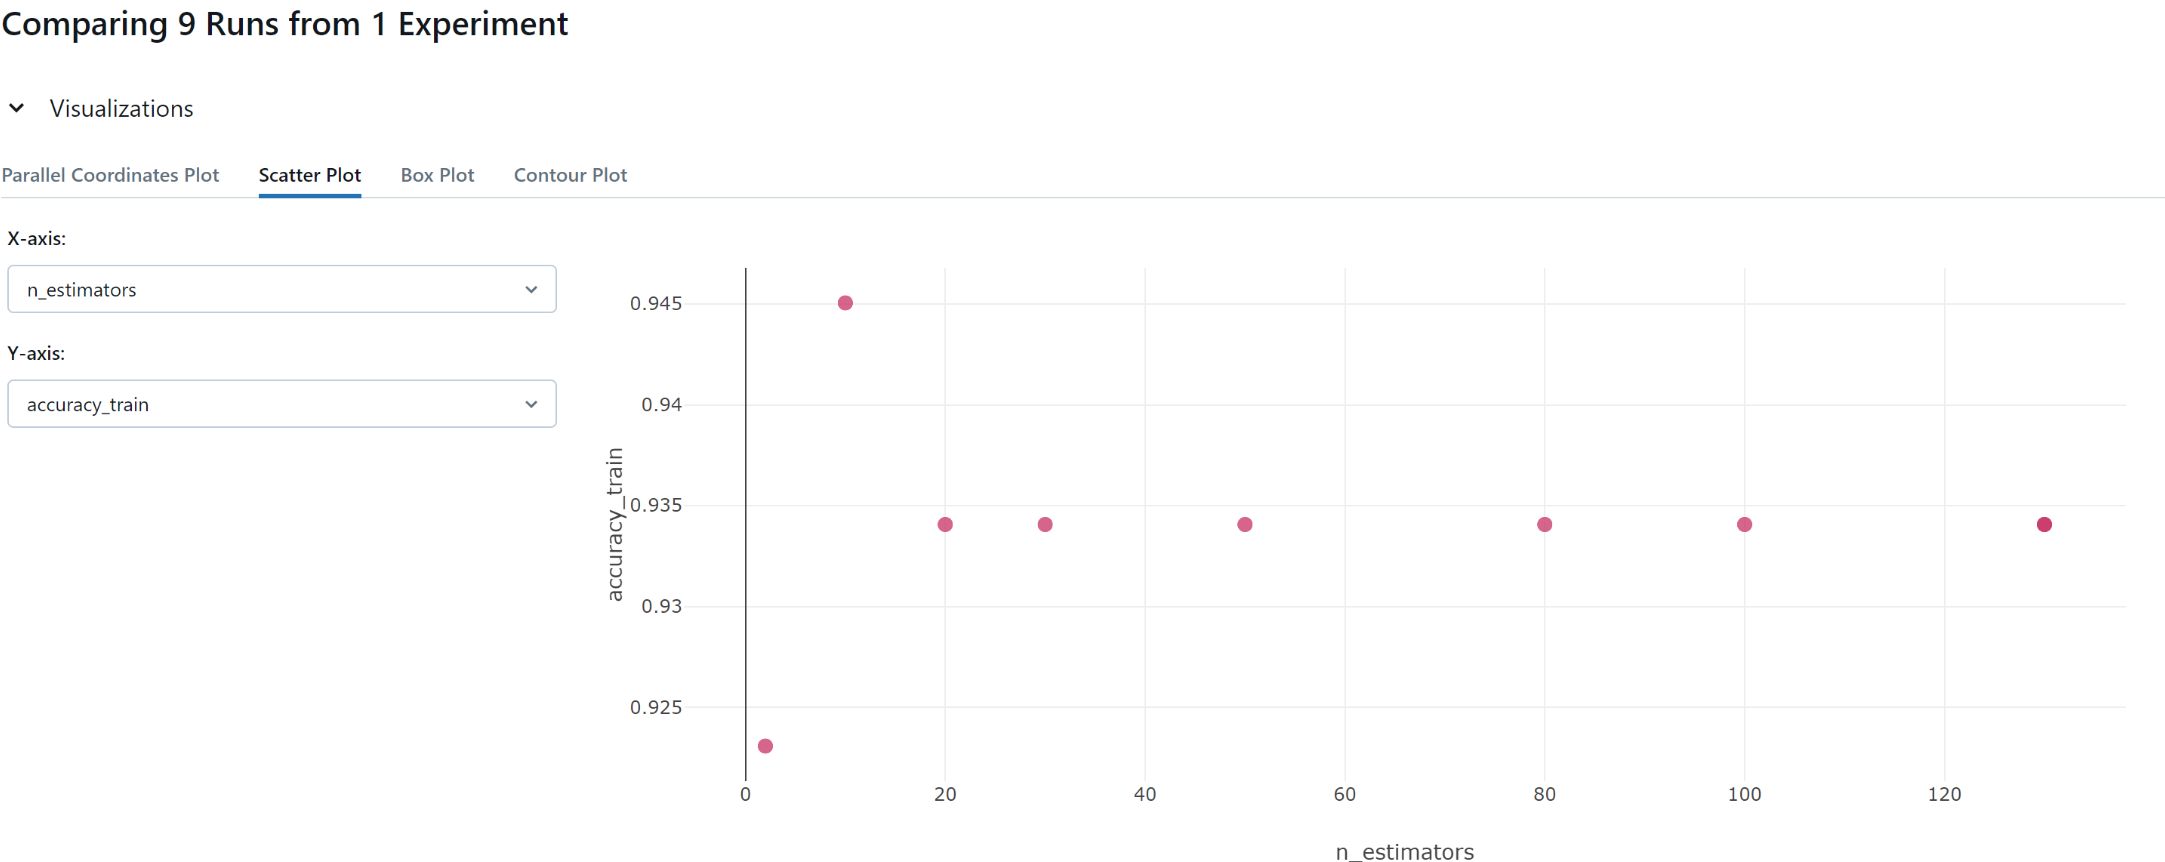

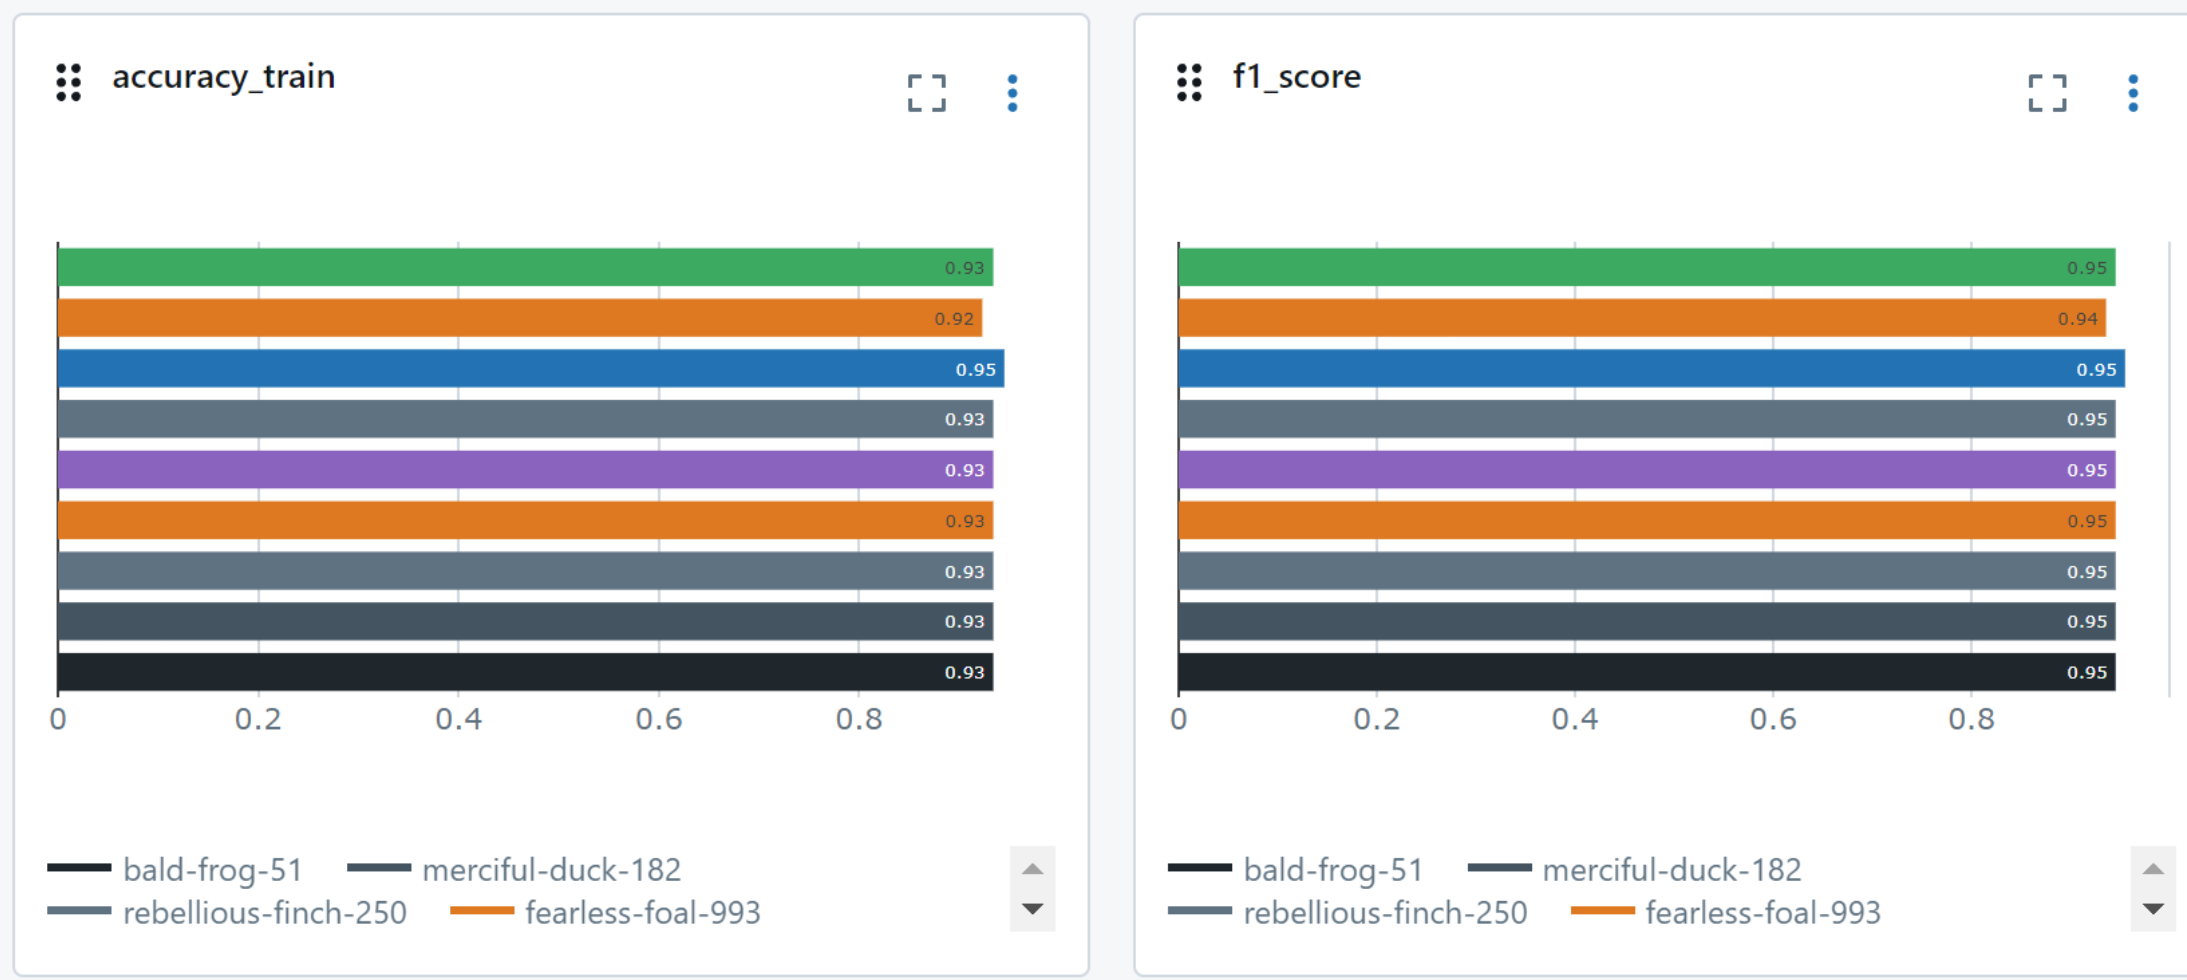

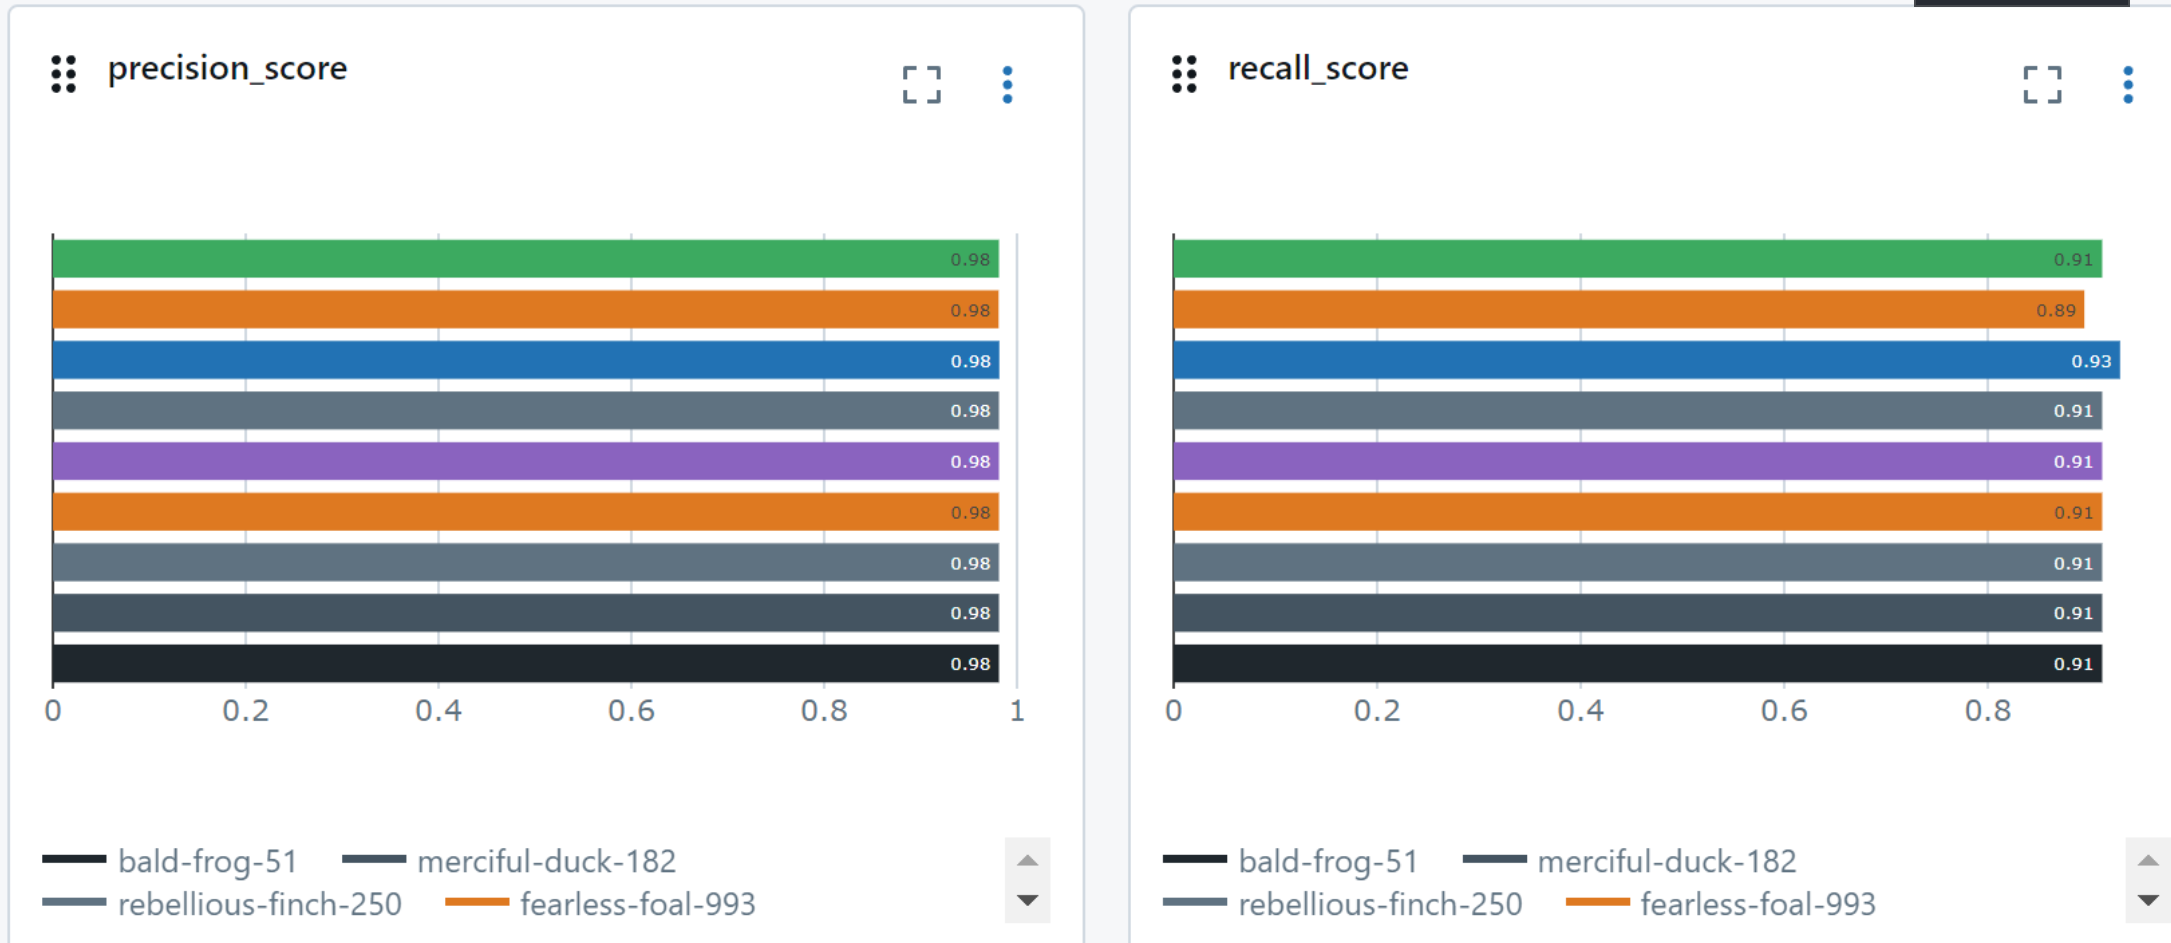

## Generar .py de funciones y main con al menos dos argumentos de entrada.

In [ ]:
%%writefile bbb.py

import pandas as pd
import numpy as np
import mlflow
import time
import mlflow.sklearn
import subprocess
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import argparse

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import f1_score, recall_score, precision_score, precision_recall_fscore_support

from sklearn.datasets import load_breast_cancer

def main():
    print("aaaa")
    parser = argparse.ArgumentParser(description='__main__ de la aplicación con argumentos de entrada.')
    parser.add_argument('--nombre_job', type=str, help='Valor para el parámetro nombre_documento.')
    parser.add_argument('--n_estimators_list', nargs='+', type=int, help='List of n_estimators values.')
    args = parser.parse_args()
    nombre_job = args.nombre_job
    n_estimators = args.n_estimators_list

    cancer = load_breast_cancer()
    df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
    df['target'] = cancer['target']

    # Split data into train and test sets
    train, test = train_test_split(df, test_size=0.2)
    test_target = test['target']
    test[['target']].to_csv('test-target.csv', index=False)
    del test['target']
    test.to_csv('test.csv', index=False)


    features = [x for x in list(train.columns) if x != 'target']
    x_raw = train[features]
    y_raw = train['target']
    x_train, x_test, y_train, y_test = train_test_split(x_raw, y_raw,
                                                                test_size=.20,
                                                                random_state=123,
                                                                stratify=y_raw)

    mlflow_ui_process = subprocess.Popen(['mlflow', 'ui', '--port', '5000'])

    mlflow.set_experiment('Carles Practica: Cancer Classifier with Accuracy')
    for i in n_estimators:
      with mlflow.start_run() as run:
        clf = RandomForestClassifier(n_estimators=i,
                                    min_samples_leaf=2,
                                    class_weight='balanced',
                                    random_state=42)

        preprocessor = Pipeline(steps=[('scaler', StandardScaler())])

        model = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('RandomForestClassifier', clf)])

        model.fit(x_train, y_train)

        test_predict = model.predict(x_test)

        # Calcular las métricas
        metric_f1_score = f1_score(y_test, test_predict, average='binary')
        metric_recall_score = recall_score(y_test, test_predict, average='binary')
        metric_precision_score = precision_score(y_test, test_predict, average='binary')
        metric_accuracy_score = accuracy_score(y_test, test_predict, normalize=True, sample_weight=None)


        accuracy_train = model.score(x_train, y_train)
        model.score(x_test, y_test)

        mlflow.log_metric('m1', 1.0)
        mlflow.log_param('n_estimators', i)
        mlflow.log_metric('accuracy_train', metric_accuracy_score)
        mlflow.log_metric('f1_score', metric_f1_score)
        mlflow.log_metric('recall_score', metric_recall_score)
        mlflow.log_metric('precision_score', metric_precision_score)
        mlflow.log_param('n_stimators', i)
        mlflow.sklearn.log_model(model, 'classifier_model')
        time.sleep(1)

if __name__ == "__main__":
    main()


Overwriting bbb.py


In [ ]:
!python3 bbb.py \
--nombre_job "Carles_script" \
--n_estimators_list 2 10 20 30 50 80 100 130

aaaa
[2024-07-13 22:24:14 +0000] [18743] [INFO] Starting gunicorn 22.0.0
[2024-07-13 22:24:14 +0000] [18743] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2024-07-13 22:24:14 +0000] [18743] [ERROR] Retrying in 1 second.
[2024-07-13 22:24:15 +0000] [18743] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2024-07-13 22:24:15 +0000] [18743] [ERROR] Retrying in 1 second.
[2024-07-13 22:24:16 +0000] [18743] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2024-07-13 22:24:16 +0000] [18743] [ERROR] Retrying in 1 second.
[2024-07-13 22:24:17 +0000] [18743] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2024-07-13 22:24:17 +0000] [18743] [ERROR] Retrying in 1 second.
[2024-07-13 22:24:18 +0000] [18743] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2024-07-13 22:24:18 +0000] [18743] [ERROR] Retrying in 1 second.
[2024-07-13 22:24:19 +0000] [18743] [ERROR] Can't connect to ('127.0.0.1', 5000)
Running the mlflow server failed. Please see the logs above for details.
/usr/local/lib/python3.10/di

## Práctica parte FastAPI

### Para esta parte de la práctica teneis que generar un script con al menos 5 modulos app.get y dos de ellos tienen que ser pipelines de HF.

### Parte de la practica se tendra que entregar en capturas de pantalla. Las capturas de pantalla a adjuntas son las siguientes.

### 1. Captura de la pantalla docs con al menos 5 modulos.
### 2. Captura de cada una de los modulos con la respuesta dentro de docs.
### 3. Captura de cada uno de los modulos en la llamada https.
### 4. Todo el codigo usado durante el proceso. Notebooks y scripts.

### Opcional

### 5. Despliegue del script en GCP Cloud Run

# **NO PUEDO ADJUNTAR CAPTURAS YA QUE NO SE ME ACTUALIZA LA APLICACIÓN, SE ME QUEDA CON EL PRIMER GET QUE HICE DE PRUEBA**

In [47]:
!pip install fastapi
!pip install pyngrok
!pip install ngrok
!pip install uvicorn

In [48]:
from pyngrok import ngrok
ngrok.kill()

In [50]:
import nest_asyncio
from pyngrok import ngrok, conf

NGROK_TOKEN = '2jEwvUjyqoJpMo8U1ejUMaf27Gz_6FXVhxgatPKjYS7WWYpsg'
conf.get_default().auth_token = NGROK_TOKEN

ngrok.kill()

ngrok_tunnel = ngrok.connect(addr='8000', proto='http', bind_tls=True)
print('Este es el URL,',ngrok_tunnel.public_url)
nest_asyncio.apply()

Este es el URL, https://ff3c-34-16-197-119.ngrok-free.app


In [51]:
from fastapi import FastAPI
from transformers import pipeline

app = FastAPI()

# Endpoint principal
@app.get("/saludo")
def read_root():
    return {"message": "Bienvenido a la API de Carles"}

# Endpoint para obtener el cuadrado de un número
@app.get("/square/{number}")
def read_square(number: int):
    return {"number": number, "square": number ** 2}

# Endpoint para obtener la longitud de una cadena de texto
@app.get("/length/{text}")
def get_length(text: str):
    return {"text": text, "length": len(text)}

# Pipeline de Hugging Face para análisis de sentimientos
@app.get("/sentiment/{text}")
def analyze_sentiment(text: str):
    sentiment_pipeline = pipeline('sentiment-analysis')
    result = sentiment_pipeline(text)
    return {"text": text, "sentiment": result[0]}

# Pipeline de Hugging Face para generación de texto
@app.get("/generate_text/{prompt}")
def generate_text(prompt: str):
    text_generator = pipeline('text-generation', model='gpt-2')
    result = text_generator(prompt, max_length=50)
    return {"prompt": prompt, "generated_text": result[0]['generated_text']}

In [52]:
! uvicorn main:app --reload  --port 8000

INFO:     Will watch for changes in these directories: ['/content']
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [12506] using WatchFiles
INFO:     Started server process [12508]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     101.109.84.47:0 - "GET / HTTP/1.1" 404 Not Found
INFO:     101.109.84.47:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     101.109.84.47:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     101.109.84.47:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [12508]
INFO:     Stopping reloader process [12506]
